In [72]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
## Unpickle the data
## This is cleaned data with all features, including dummies for categorical variables.
df = pd.read_pickle('intial_data_all_features')
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,23,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,41,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,27,0,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,11,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,17,0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
df.drop_duplicates(inplace=True)
df.shape

(1071, 38)

In [75]:
## drop experiment
df = df.drop(columns = ['domestic_gross', 'opening_dollars','franchise'])
df.head()

,name,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,title_length,Drama,Comedy,Action,Thriller,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,1.027000e+09,148,54,4336,23,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,2.076897e+08,132,159,4300,41,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,2.885000e+08,97,131,4225,27,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,1.959797e+08,134,215,4275,11,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,5.532236e+08,143,229,4203,17,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0


In [76]:
## drop audience ratings
df = df.drop(columns = ['Not Rated', 'PG', 'PG-13', 'R', 'Unrated'])
df.head()

,name,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,title_length,Drama,Comedy,Action,Thriller,...,History,Music,Documentary,Musical,War,Sport,Western,Spring,Summer,Winter
0,Spider-Man: No Way Home,1.027000e+09,148,54,4336,23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,2.076897e+08,132,159,4300,41,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Venom: Let There Be Carnage,2.885000e+08,97,131,4225,27,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Black Widow,1.959797e+08,134,215,4275,11,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,F9: The Fast Saga,5.532236e+08,143,229,4203,17,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [77]:
df.shape

(1071, 30)

In [78]:
## Separate target and other features
X = df.drop(columns = ['international_gross', 'name'])
y = df['international_gross']
y.head()

0    1.027000e+09
1    2.076897e+08
2    2.885000e+08
3    1.959797e+08
4    5.532236e+08
Name: international_gross, dtype: float64

In [79]:
## Split into train/validate/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [80]:
X_train.shape, y_train.shape

((856, 28), (856,))

In [81]:
model = LinearRegression()
reg_mod = model.fit(X_train, y_train)

In [82]:
predictions = model.predict(X_train)
mean_absolute_error(y_train, predictions)

82954366.83980335

In [83]:
model.score(X_train, y_train)

0.41532837605929673

In [84]:
model.intercept_

-302496149.10629785

In [85]:
model.coef_

array([ 2.25800236e+06,  1.61193060e+05,  4.24172238e+04,  9.52754779e+05,
       -3.39027800e+07, -3.74874186e+07,  1.79392825e+07, -2.13114126e+07,
        6.51166314e+07, -2.23743990e+07,  1.66087417e+07, -1.34251894e+07,
       -1.33325088e+06,  5.51947640e+06, -2.28018568e+07, -1.61281714e+07,
        9.13452173e+05,  4.62540089e+07, -1.06435175e+07,  8.04552851e+06,
       -4.71504600e+06,  5.89136342e+07,  2.86831292e+07, -2.70148226e+07,
       -8.59190144e+07,  9.36264296e+06,  2.19986432e+07, -1.10885265e+07])

In [86]:
lm = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 6)
lm_cv = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'r2')
print(lm_cv)

[0.38919708 0.21893845 0.34960271 0.34876319 0.39740726]


In [87]:
lm_cv_mae = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'neg_mean_absolute_error')
print(lm_cv_mae)

[-95374155.72654511 -82246543.48698118 -90065768.75050618
 -78536195.88671735 -91718599.07716124]


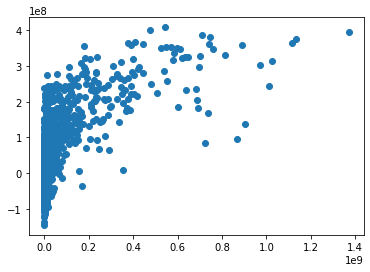

In [88]:
# Fitted vs. Actual
y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred)
#plt.plot()

Text(0.5, 1.0, 'Residuals vs. Predictions')

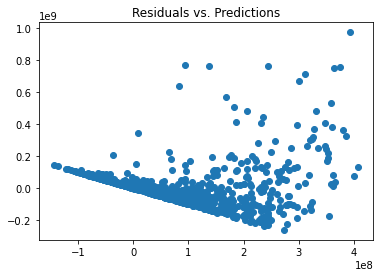

In [89]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.title("Residuals vs. Predictions")

## VIF

In [90]:
## Check VIF becasue I know from MVP that there may be some multicollinearity issues.
## Code adapted from Collinearity slides

VIF_x = X_train
VIF_x = sm.add_constant(X_train)
VIF_y = y_train
sm_model = sm.OLS(VIF_y, VIF_x)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     international_gross   R-squared:                       0.415
Model:                             OLS   Adj. R-squared:                  0.396
Method:                  Least Squares   F-statistic:                     20.98
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):           9.80e-78
Time:                         20:41:01   Log-Likelihood:                -17211.
No. Observations:                  856   AIC:                         3.448e+04
Df Residuals:                      827   BIC:                         3.462e+04
Df Model:                           28                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.025e+08   3.86e+07     -7.845      0.000   -3.78e+08   -2.27e+08
running_time_mins           2.258e+06   2.83e+05      7.982      0.000     1.7e+06    2.81e+06
days_in_release             1.612e+05   3.93e+04      4.101      0.000     8.4e+04    2.38e+05
widest_release_in_theatres  4.242e+04   3880.954     10.930      0.000    3.48e+04       5e+04
title_length                9.528e+05   5.23e+05      1.823      0.069   -7.29e+04    1.98e+06
Drama                       -3.39e+07   1.22e+07     -2.778      0.006   -5.79e+07   -9.95e+06
Comedy                     -3.749e+07    1.2e+07     -3.128      0.002    -6.1e+07    -1.4e+07
Action                      1.794e+07   1.37e+07      1.310      0.191   -8.95e+06    4.48e+07
Thriller                   -2.131e+07   1.35e+07     -1.575      0.116   -4.79e+07    5.25e+06
Adventure                   6.512e+07   1.54e+07      4.235      0.000    3.49e+07    9.53e+07
Fantasy                    -2.237e+07   1.49e+07     -1.501      0.134   -5.16e+07    6.89e+06
Sci-Fi                      1.661e+07   1.43e+07      1.159      0.247   -1.15e+07    4.47e+07
Crime                      -1.343e+07   1.49e+07     -0.899      0.369   -4.27e+07    1.59e+07
Family                     -1.333e+06   2.19e+07     -0.061      0.952   -4.44e+07    4.17e+07
Romance                     5.519e+06   1.47e+07      0.376      0.707   -2.33e+07    3.43e+07
Biography                   -2.28e+07   1.61e+07     -1.414      0.158   -5.44e+07    8.84e+06
Horror                     -1.613e+07    1.8e+07     -0.898      0.369   -5.14e+07    1.91e+07
Mystery                     9.135e+05   1.66e+07      0.055      0.956   -3.18e+07    3.36e+07
Animation                   4.625e+07   2.24e+07      2.062      0.040    2.21e+06    9.03e+07
History                    -1.064e+07   2.15e+07     -0.494      0.621   -5.29e+07    3.16e+07
Music                       8.046e+06   2.39e+07      0.337      0.736   -3.88e+07    5.49e+07
Documentary                -4.715e+06   2.64e+07     -0.178      0.858   -5.66e+07    4.72e+07
Musical                     5.891e+07   2.54e+07      2.323      0.020    9.14e+06    1.09e+08
War                         2.868e+07    2.5e+07      1.146      0.252   -2.04e+07    7.78e+07
Sport                      -2.701e+07   2.46e+07     -1.098      0.272   -7.53e+07    2.13e+07
Western                    -8.592e+07   4.11e+07     -2.089      0.037   -1.67e+08   -5.18e+06
Spring                      9.363e+06   1.34e+07      0.698      0.485    -1.7e+07    3.57e+07
Summer                        2.2e+07    1.3e+07      1.693      0.091   -3.51e+06    4.75e+07
Winter                     -1.109e+07   1.33e+07     -0.834      0.404   -3.72e+07     1.5e+07
================================

In [91]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[72.08847634527223,
 1.4363996679298556,
 1.3115603951687163,
 1.4345723254496558,
 1.1057650392393616,
 1.8021034706189623,
 1.580248882626749,
 1.9400095747233115,
 1.8692660412472988,
 2.375770013006939,
 1.6139070496296615,
 1.4086988379989993,
 1.3661285935713834,
 2.7511574822397638,
 1.2943778890514492,
 1.4111542119309386,
 1.791201662164442,
 1.5038363987524495,
 2.2509650337124025,
 1.2596210666116285,
 1.1137419854508386,
 1.5086676532454069,
 1.1891254544722267,
 1.1251237683330804,
 1.1190587644685237,
 1.0406640761107133,
 1.4901107487927348,
 1.5681154851128747,
 1.6112728998850276]

In [98]:
## Let's try Lasso since we still have a lot of features and it will eliminate some
## Code adapted from Lasso slides and Lasso exercise answers


std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
train_r_squared = lasso.score(X_tr, y_train)
#test_r_squared = lasso.score(X_te, y_test)
#print(test_r_squared)
print(train_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
print(len(list(zip(X_train.columns, lasso.coef_))))


0.41532822861529917
[('running_time_mins', 43438985.34252681), ('days_in_release', 21311322.87665183), ('widest_release_in_theatres', 59445803.630905315), ('title_length', 8702824.528311366), ('Drama', -16914969.978969112), ('Comedy', -17830645.874761403), ('Action', 8282465.553589161), ('Thriller', -9752750.674917389), ('Adventure', 29639888.12511413), ('Fantasy', -8632722.134580212), ('Sci-Fi', 6252490.479423354), ('Crime', -4758741.098870507), ('Family', -420719.8894247631), ('Romance', 1935330.147176345), ('Biography', -7619208.275706741), ('Horror', -5433519.000699014), ('Mystery', 277748.2552824218), ('Animation', 14008448.642681198), ('History', -2511516.308621726), ('Music', 1606186.0719962446), ('Documentary', -970899.5917479515), ('Musical', 11495718.475426722), ('War', 5511661.619990275), ('Sport', -5267239.973006753), ('Western', -9662149.866373813), ('Spring', 3856827.713732532), ('Summer', 9605783.917736871), ('Winter', -4803439.316671571)]
28


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
#r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

print(r_squared_train)
# print(r_squared_test)
print(alpha)


0.41532837604473904
100.0


Computing regularization path using the LARS ...


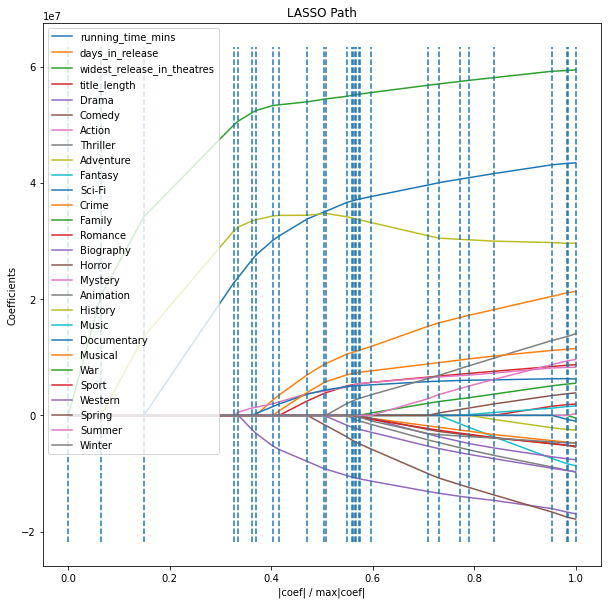

In [94]:
from sklearn.linear_model import lars_path
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-2,2,200)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

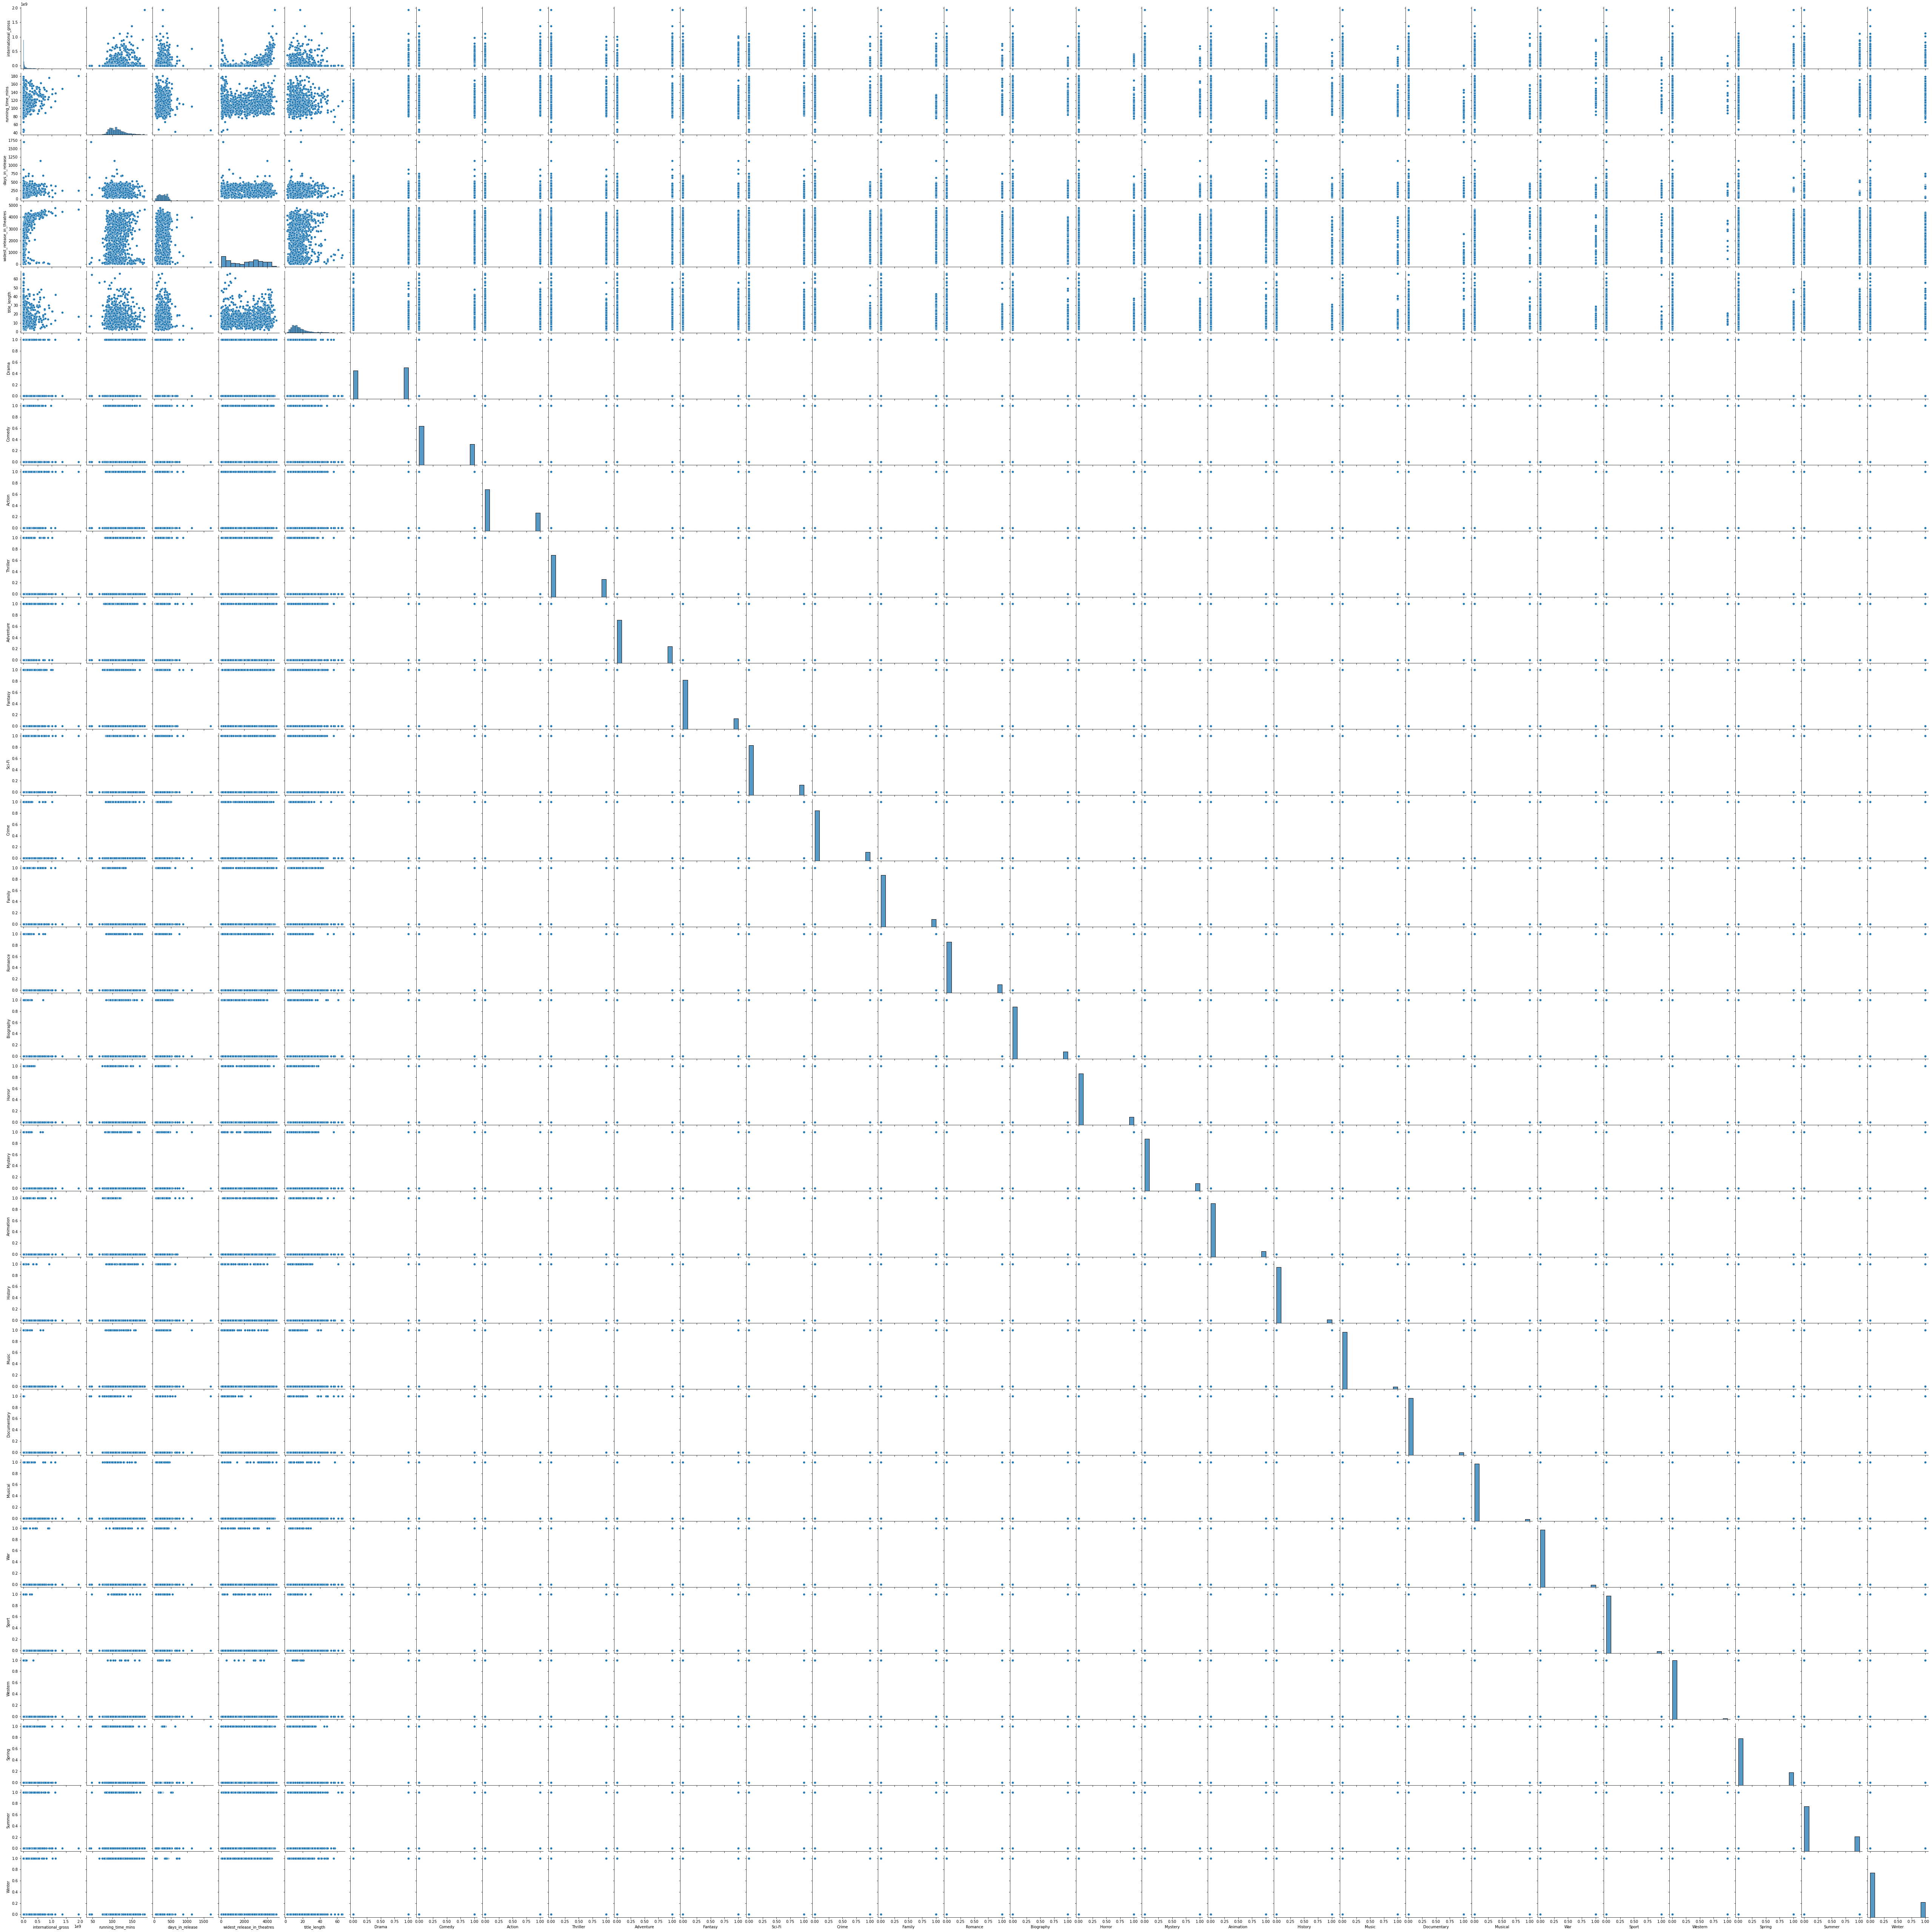

In [96]:
import seaborn as sns
sns.pairplot(df)